In [2]:
import pandas as pd
import jieba
import jieba.posseg as pseg
import jieba.analyse

import nltk
from nltk.book import *

# encoding=gbk

In [3]:
df = pd.read_csv('D:/CrtFile/crm_req_20171122')
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 0 to 10894
Data columns (total 13 columns):
stat_day           7501 non-null object
kfuin              7501 non-null object
qq                 7501 non-null object
is_b2c             7501 non-null object
is_delay           7501 non-null object
is_not_ack         7501 non-null object
msg_c2b            7501 non-null object
msg_b2c            7501 non-null object
recv_msg_num       7501 non-null object
send_msg_num       7501 non-null object
first_recv_date    5795 non-null object
first_send_date    4489 non-null object
msg                5795 non-null object
dtypes: object(13)
memory usage: 820.4+ KB


In [4]:
msg_list = [ str(msg) for msg in df['msg'] ]
print len(msg_list)

all_text = ' '.join(msg_list)
print len(all_text)

7501
970938


In [40]:
import jieba
user_dict = './NLP with python/wpa_dict.txt'
stop_dict = './NLP with python/stop_word_dict.txt'

text = all_text[:1001]
print text

 下   在   没定单啊   不是   是申请的   网上申请的企业   qq   嗯嗯   多少钱呢   暂时2   个   多少一个企业QQ   你好   企业qq换手机在哪换   网址发一下   谢谢   ?   企业QQ换手机   怎么换   500人的企业号   多少钱一个   嗯   一个工号120?   那100个工号呢   有10个工号的吗   我人不是很多   只需10个工号   价格是多少   这个怎么购买呢   个人现在还不行吗   官网能发下吗   我找不到  nan  zaima   nan nan  我QQ  为啥加不上人？   我给100   300   500   600   1000   500000   56.636   6200000   ko?\   在？   企业号可以开2000人群？   是的   把你的这么回复关了   0  nan  你好   企业QQ30个多少钱一年   标准的   贵了   你这价格   有人买5000   扯蛋   百度我都查了   你应该是代理   你是代理还是   哦哦   代理也买6000   坑啊   能用一年就好了   不要了   你们自己用吧   那为什么人家买的比你


In [41]:
#去除标点符号
#-*-coding:utf-8-*-
def trim_puntuation(str):
    import re 
    tmp_str = str.decode("utf8")
    #print tmp_str
    puntuation = "[0-9\s+\.\!\/_,$%^*(+\"\'\\]+|[+——！，。？?、~@#￥%……&*（）]+".decode("utf8")
    #print puntuation   
    res_str = re.sub(puntuation, " ".decode("utf8"), tmp_str)
    return res_str

In [42]:
#过滤停用词  
import codecs
def trim_stop_word(word_list, stop_word_file):
    st = codecs.open(stop_word_file, 'rb',encoding='utf-8')      
    stopwords = [ line.strip() for line in st ]  
    return [ w for w in word_list if len(w.strip()) >0 and w not in stopwords ]

In [58]:
def fen_ci(msg):
    text_pun = trim_puntuation(msg)
    word_list = trim_stop_word(jieba.lcut(text_pun), stop_dict)
    return ' '.join(word_list)

In [43]:
jieba.load_userdict(user_dict)
text_pun = trim_puntuation(text)
#print text
word_list = trim_stop_word(jieba.lcut(text_pun), stop_dict)
print ( '/'.join(word_list))

下/没/定单/不是/申请/网上/申请/企业/qq/多少钱/暂时/一个/企业/QQ/你好/企业/qq/换/手机/哪换/网址/发/一下/谢谢/企业/QQ/换/手机/换/人/企业/号/多少钱/一个/一个/工号/工号/工号/我人/不是/很多/只/需/工号/价格/购买/个人/现在/还/不行/官网/发下/找/不到/nan/zaima/nan/nan/QQ/为啥/加不上/人/ko/\/企业/号/开/人群/回复/关/nan/你好/企业/QQ/多少钱/一年/标准/贵/价格/有人/买/扯蛋/百度/都/查/应该/代理/代理/代理/买/坑/一年/好/不要/买


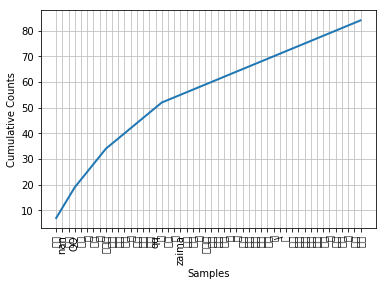

In [44]:
wpa = nltk.Text(word_list)
fd = FreqDist(wpa)
fd.plot(50, cumulative=True)

In [50]:
# 获取排序
sort_list = sorted(fd.items(), key = lambda d:d[1], reverse=True)
for w,c in sort_list[:50]:
    print "%s -> %d " %(w,c),

企业 -> 7  nan -> 4  工号 -> 4  QQ -> 4  代理 -> 3  买 -> 3  一个 -> 3  换 -> 3  多少钱 -> 3  手机 -> 2  价格 -> 2  申请 -> 2  人 -> 2  一年 -> 2  不是 -> 2  你好 -> 2  qq -> 2  号 -> 2  很多 -> 1  需 -> 1  zaima -> 1  人群 -> 1  一下 -> 1  下 -> 1  加不上 -> 1  标准 -> 1  网上 -> 1  定单 -> 1  开 -> 1  没 -> 1  不要 -> 1  官网 -> 1  百度 -> 1  个人 -> 1  不行 -> 1  关 -> 1  \ -> 1  贵 -> 1  购买 -> 1  现在 -> 1  扯蛋 -> 1  谢谢 -> 1  为啥 -> 1  我人 -> 1  发 -> 1  有人 -> 1  不到 -> 1  还 -> 1  应该 -> 1  发下 -> 1 


In [46]:
jieba.load_userdict(user_dict)
jieba.analyse.set_stop_words(stop_dict)
key_words = jieba.analyse.extract_tags(text, topK=20, withWeight=True)
for key, w in key_words:
    print key,w

工号 0.646543146605
nan 0.556035697809
QQ 0.417026773357
企业 0.343632619705
多少钱 0.279578149553
500 0.278017848905
100 0.278017848905
qq 0.278017848905
10 0.278017848905
代理 0.250271311033
你好 0.185066936671
手机 0.143530740189
申请 0.139988266273
600 0.139008924452
zaima 0.139008924452
56.636 0.139008924452
加不上 0.139008924452
5000 0.139008924452
官网 0.139008924452
6000 0.139008924452


In [67]:
jieba.load_userdict(user_dict)
#[ fen_ci(str(msg)) for msg in df['msg'] ]

df['words'] = map(fen_ci, map(str, df['msg']))

In [72]:
df['msg'][:10]

0                                               下   在 
1     没定单啊   不是   是申请的   网上申请的企业   qq   嗯嗯   多少钱呢  ...
2                                            多少一个企业QQ 
3     你好   企业qq换手机在哪换   网址发一下   谢谢   ?   企业QQ换手机   ...
4                                                  NaN
5                                              zaima  
6                                                  NaN
7                                                  NaN
8     我QQ  为啥加不上人？   我给100   300   500   600   1000...
9             在？   企业号可以开2000人群？   是的   把你的这么回复关了   0 
Name: msg, dtype: object

In [73]:
df['words'][:10]

0                                                    下
1                           没 定单 申请 网上 申请 企业 qq 多少钱 暂时
2                                             一个 企业 QQ
3    你好 企业 qq 换 手机 哪换 网址 发 谢谢 企业 QQ 换 手机 换 人 企业 号 多...
4                                                  nan
5                                                zaima
6                                                  nan
7                                                  nan
8                                     QQ 为啥 加不上 人 ko \
9                                       企业 号 开 人群 回复 关
Name: words, dtype: object

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?'
]

corpus = df['words'][:10]
vectorizer = CountVectorizer(ngram_range=(1,1), binary=True)
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [77]:
X.shape

(10, 63)

In [85]:
print '/'.join(vectorizer.get_feature_names())

ko/nan/qq/zaima/一个/不到/不行/为啥/人群/价格/企业/你好/加不上/发下/哪换/回复/多少钱/官网/定单/工号/很多/我人/手机/暂时/申请/网上/网址/谢谢/购买
